## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [ ]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('/Users/Shyam/Desktop/Ironhack-Bootcamp/Week 2/D5/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv')

In [12]:
df = data.copy()


In [13]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [14]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1370545.35,816056.17,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.15,2.19,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,480.63,5944.12,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,89.24,345.61,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,25.90,240.48,0.0,0.00,0.00,0.00,50000.0


In [50]:
# Analyse best seller trends across product catagories
# crosstab between the product `category` and the `isBestSeller` status
crosstab = pd.crosstab(cat['category'], cat['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [36]:
#Are there categories where being a best-seller is more prevalent? 
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.
bestseller_proportions = pd.crosstab(cat['category'], cat['isBestSeller'], normalize='index')

if True in bestseller_proportions.columns:
    bestseller_prop = bestseller_proportions[True].sort_values(ascending=False)
elif 1 in bestseller_proportions.columns:
    bestseller_prop = bestseller_proportions[1].sort_values(ascending=False)
else:
    # Alternative calculation
    bestseller_prop = cat.groupby('category')['isBestSeller'].mean().sort_values(ascending=False)

print("\n=== Proportion of Best-Sellers by Category (Sorted) ===")
print(bestseller_prop)


=== Proportion of Best-Sellers by Category (Sorted) ===
category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Bedding Collections               0.000000
CPUs                              0.000000
CD, Disc & Tape Players           0.000000
Blank Media Cases & Wallets       0.000000
eBook Readers & Accessories       0.000000
Name: True, Length: 296, dtype: float64



2. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

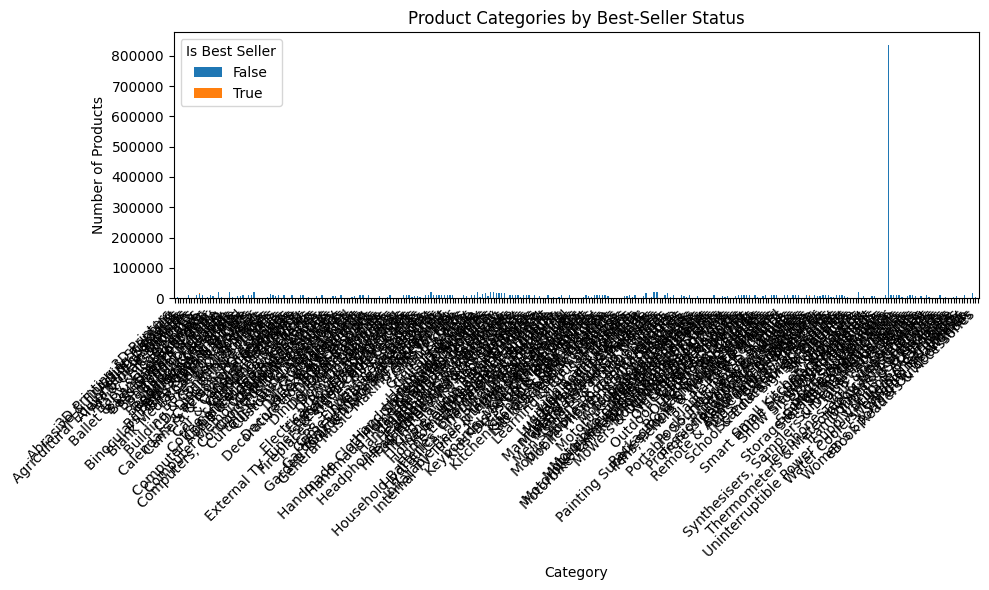

In [37]:
# Visualize stacked barchart b/w categories and best-seller
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Product Categories by Best-Seller Status')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.legend(title='Is Best Seller')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [38]:
import numpy as np

In [42]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [46]:
# Calculate Q1, Q3, and IQR for product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Count outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

# Remove outliers
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"\nOriginal dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_clean)}")
print(f"Products removed: {len(df) - len(df_clean)}")

Q1: 9.99
Q3: 45.99
IQR: 36.0
Lower bound: -44.01
Upper bound: 99.99000000000001

Number of outliers: 327688
Percentage of outliers: 13.41%

Original dataset size: 2443651
Dataset size after removing outliers: 2115963
Products removed: 327688


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [67]:
top_20 = df_clean['category'].value_counts().nlargest(20).index
top_20

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [69]:
flitered_df = df_clean[df_clean['category'].isin(top_20)]
flitered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/0w/j8jyj1vs7fd1hh9rpnk57syw0000gn/T/ipykernel_35061/2763069790.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=flitered_df, x="category", y="price", palette="coolwarm")


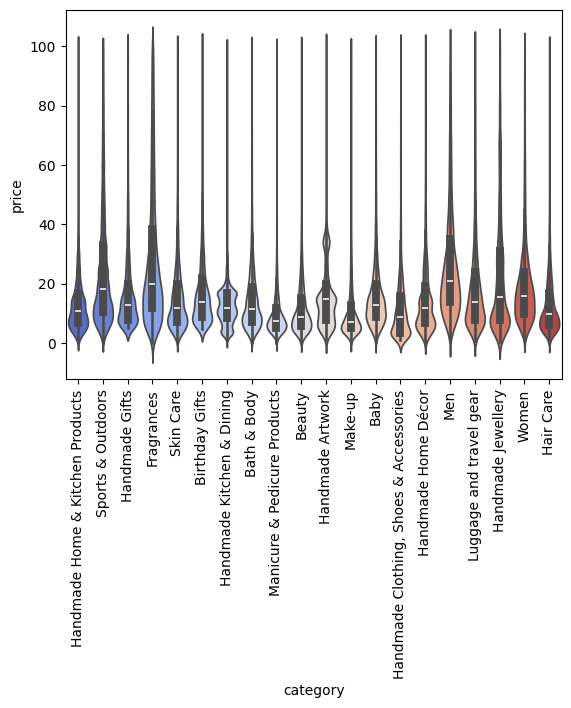

Category with highest median price: Desktop PCs
Median price: $74.00


In [74]:
sns.violinplot(data=flitered_df, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

# which product has highest median
# Find category with highest median price
median_prices = df_clean.groupby('category')['price'].median()
highest = median_prices.idxmax()
print(f"Category with highest median price: {highest}")
print(f"Median price: ${median_prices[highest]:.2f}")

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

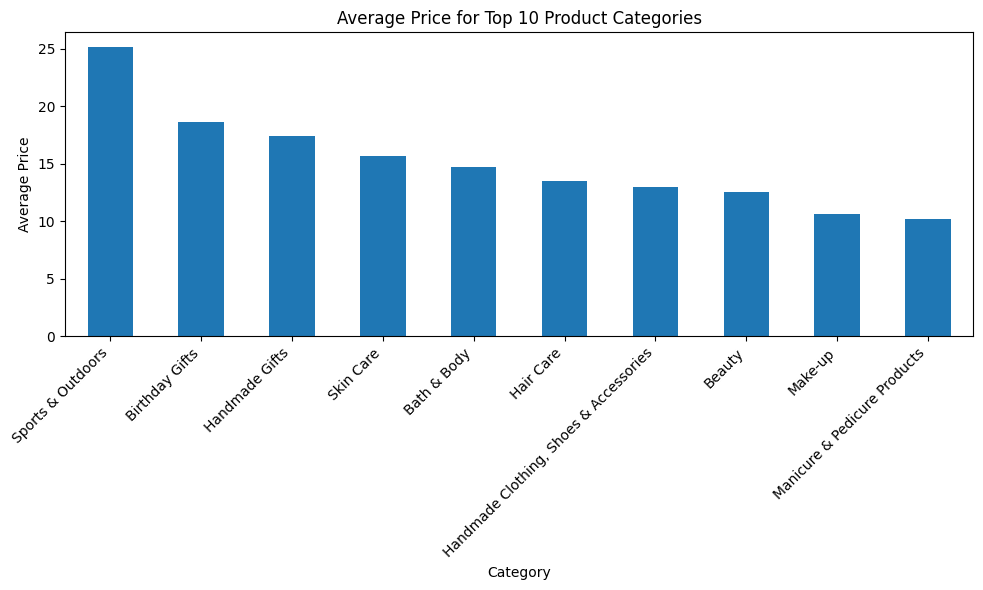

Category with highest average price of top10: Motherboards
Average_price_top10: $68.77


In [76]:

# 1. Bar chart for top 10 categories
top_10_categories = df_clean['category'].value_counts().head(10).index
df_top10 = df_clean[df_clean['category'].isin(top_10_categories)]

avg_prices_top10 = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_prices_top10.plot(kind='bar')
plt.title('Average Price for Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Find category with highest average price (all categories)
avg_prices = df_clean.groupby('category')['price'].mean()
highest = avg_prices.idxmax()

print(f"Category with highest average price of top10: {highest}")
print(f"Average_price_top10: ${avg_prices[highest]:.2f}")

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

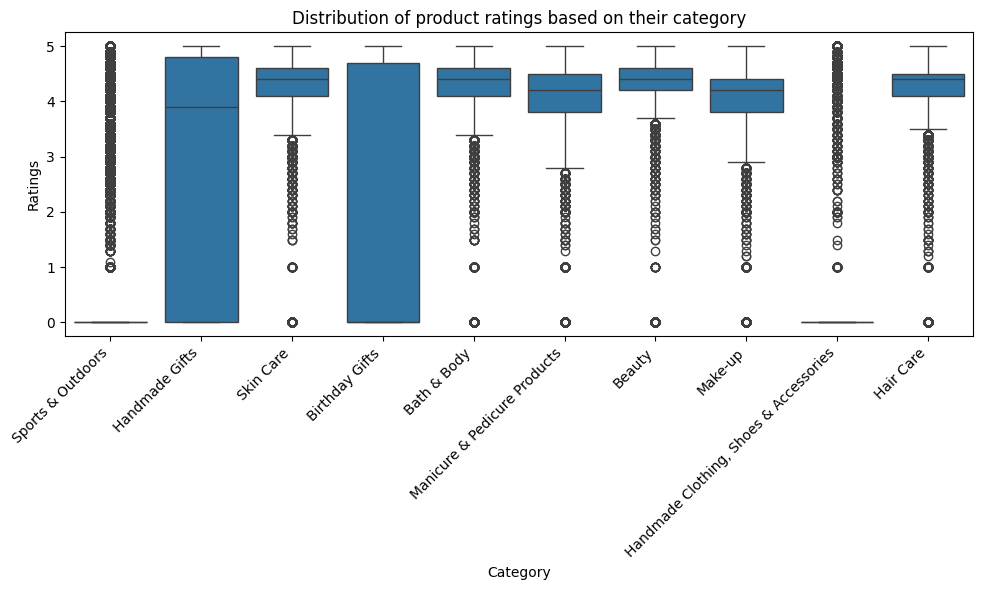

Category with highest median rating: Computer Memory
Median rating: 4.70


In [84]:
top_10_categories = df_clean['category'].value_counts().head(10).index
df_top10 = df_clean[df_clean['category'].isin(top_10_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.title('Distribution of product ratings based on their category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Find category with highest median rating (all categories)
median_ratings = df_clean.groupby('category')['stars'].median()
highest = median_ratings.idxmax()

print(f"Category with highest median rating: {highest}")
print(f"Median rating: {median_ratings[highest]:.2f}")

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [96]:
# Calculate correlation between price and stars
correlation = df['price'].corr(df['stars'])

print(f"Correlation between price and stars: {correlation:.4f}")

# Interpretation
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

if correlation > 0:
    direction = "positive"
else:
    direction = "negative"

print(f"\nThere is a {strength} {direction} correlation between price and rating.")

Correlation between price and stars: -0.1249

There is a weak negative correlation between price and rating.


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

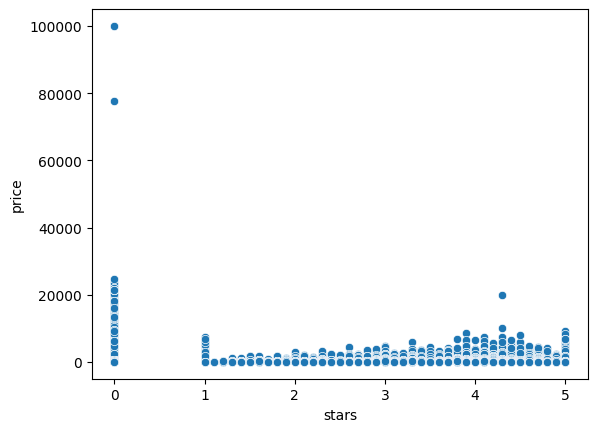

In [97]:
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

In [ ]:
#Patterns observed:

# No clear linear relationship - points are scattered randomly
# Most products cluster at 3-5 stars with prices below 10,000
# Heavy clustering at 0-1 stars at lower prices
# Few extreme outliers - some very high-priced products at 0 stars

# Conclusion: Price and rating are not strongly related. Higher prices don't guarantee better ratings.#

In [ ]:
# Correlation Matrix
num.corr()

,uid,stars,reviews,price,boughtInLastMonth
uid,1.000000,0.031696,0.019994,0.008273,0.016336
stars,0.031696,1.000000,0.085808,-0.124907,0.112536
reviews,0.019994,0.085808,1.000000,-0.013171,0.104043
price,0.008273,-0.124907,-0.013171,1.000000,-0.023439
boughtInLastMonth,0.016336,0.112536,0.104043,-0.023439,1.000000


In [102]:
# Correlation Matrix
correlation_matrix = num.corr()

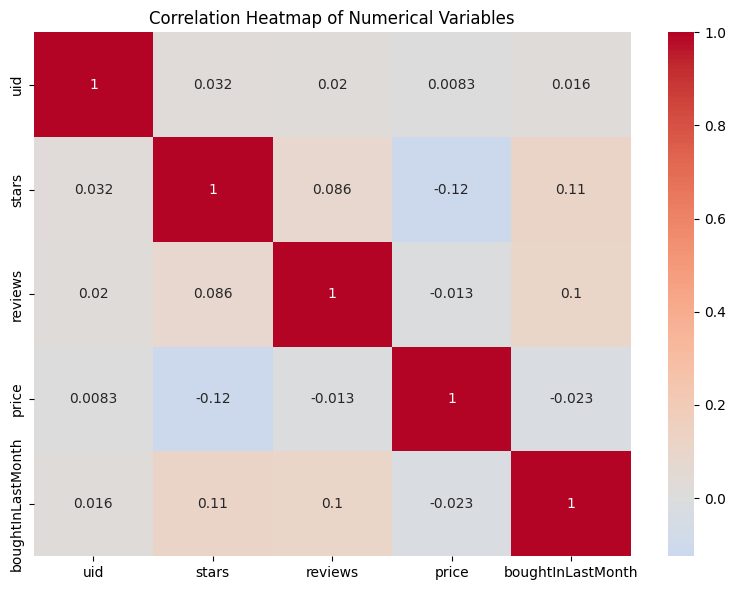

In [106]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()


**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?
